<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/2/3p_Deep_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

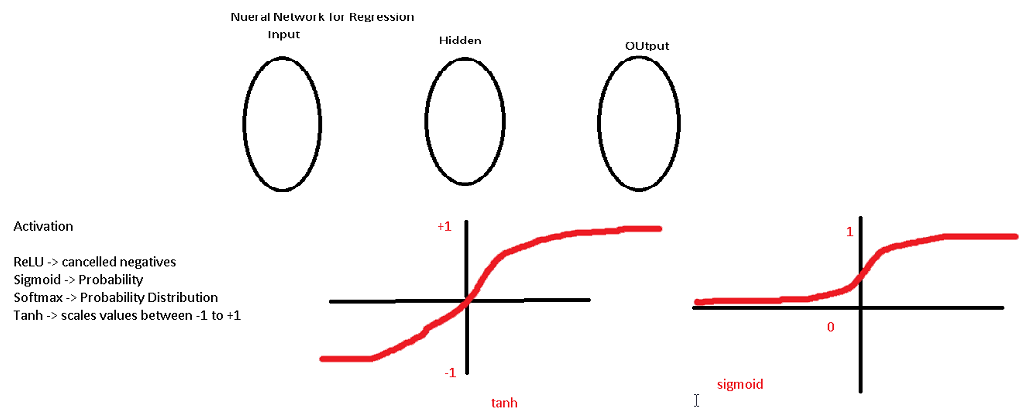

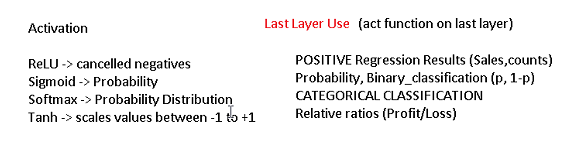

In [ ]:
# "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow import keras

TensorFlow 1.x selected.
1.15.2


In [2]:
filepath = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = keras.utils.get_file('auto-mpg.data', filepath)
print(data)

32768/30286 [================================] - 0s 2us/step
/root/.keras/datasets/auto-mpg.data


In [ ]:
# how to check file

In [ ]:
!ls 

sample_data


In [ ]:
!ls '/root/.keras/datasets/'

auto-mpg.data


In [ ]:
# !cat '/root/.keras/datasets/auto-mpg.data'

In [ ]:
# until you don't know the data don't read through code, please understand the data first
# https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [ ]:
#multi-valued discrete -> Categorical
#continuous -> Can be used for Regression

In [3]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin', 'car_name']

In [ ]:
# now we are aware that these are TSV (tab-separator) and not simple CSVs
# for cleaning of auto-mpg dataset space issues (tab,space) using pandas

In [4]:
fl = pd.read_csv(data, names=col_names, sep=' ', comment='\t', na_values='?', skipinitialspace=True)
fl.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [5]:
fl['car_name']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
Name: car_name, Length: 398, dtype: float64

In [ ]:
#NaN, NaT -> Not a number, Not a time
#pd.drop_na takes care of all types of NA

In [6]:
data = fl.iloc[:,:-1] # skipping car names are this is useless data for us (Correlation Test, Heatmap)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
# Replace missing values 
# Dropping them is another way

In [9]:
df = data.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:

# cleaning modes
# https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/clean-missing-data


In [ ]:
# Y is MPG is output , rest Cylinders to origin is X (inputs)

In [10]:
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [ ]:
# WE are trying to calculate MILES-PER-GALLON (mpg)

In [11]:
df.model_year.value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model_year, dtype: int64

In [ ]:
# one-hot-encoded
# WHENVER INDEPENDET CATEGORIES are present -> Origin is BLR independent of origin in BOM
# INDEPENDENT, DISTINCT VALUES
# In such a scenario -> DOES it mean ->  y = w * city + bias 
# does it mean that if city_blr was 1, and city_bom was 2, then BOM is twice of BLR?
# THIS IS NOT A VALID RELATIONSHIP! 
# IN such a scenrio-> we apply One-Hot-Encoding 
# this encoding creates NEW columns for every city -> SUCH that the city that is useful is set to 1, and others to 0 
# BOM MAA BLR
#   0   1   0    -> this means that w1*BOM + w2*MAA + w3*BLR -> w1*0 + w2*MAA + w3*0
# hence only Chennai's weight would have survived! OTHER CITIES' weights would have become 0!
# thus giving a ML equation much better suited for individual city-level prediction 

In [ ]:
# why was cylinder not one-hot-encoded?
# because there is a math relationship -> more the pistons, lesser the MPG

In [ ]:
#Columns explain
# Cylinders -> keeping them as it is
# displacement, horsepower weight,acceleration -> continuous, keep it as it is
# origin -> NOT FOLLOWING any empirical or mathematical relations, and CATEGORICAL in nature, HENCE one-hot-encoded
# model_year -> use it in 2 ways,1) keep it as it is and 2) drop. Pick the better model as per outputs!

In [12]:
# one-hot-encoded Process
origins = df.pop('origin')
# based on this pop, we can create new columns
df['BLR'] = (origins==1)*1 # TRUE *1 = 1 
df['MAA'] = (origins==2)*1
df['BOM'] = (origins==3)*1

df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,BLR,MAA,BOM
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [13]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,BLR,MAA,BOM
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
# 394 was supposed to be data for Chennai. Hence, better weights will be learnt 

In [ ]:
# One-Hot-Encoded Columns can be used for filtering also! 

In [14]:
(origins==2)*1

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    1
395    0
396    0
397    0
Name: origin, Length: 392, dtype: int64

In [15]:
traindata = df.sample(frac=0.75, random_state=42)

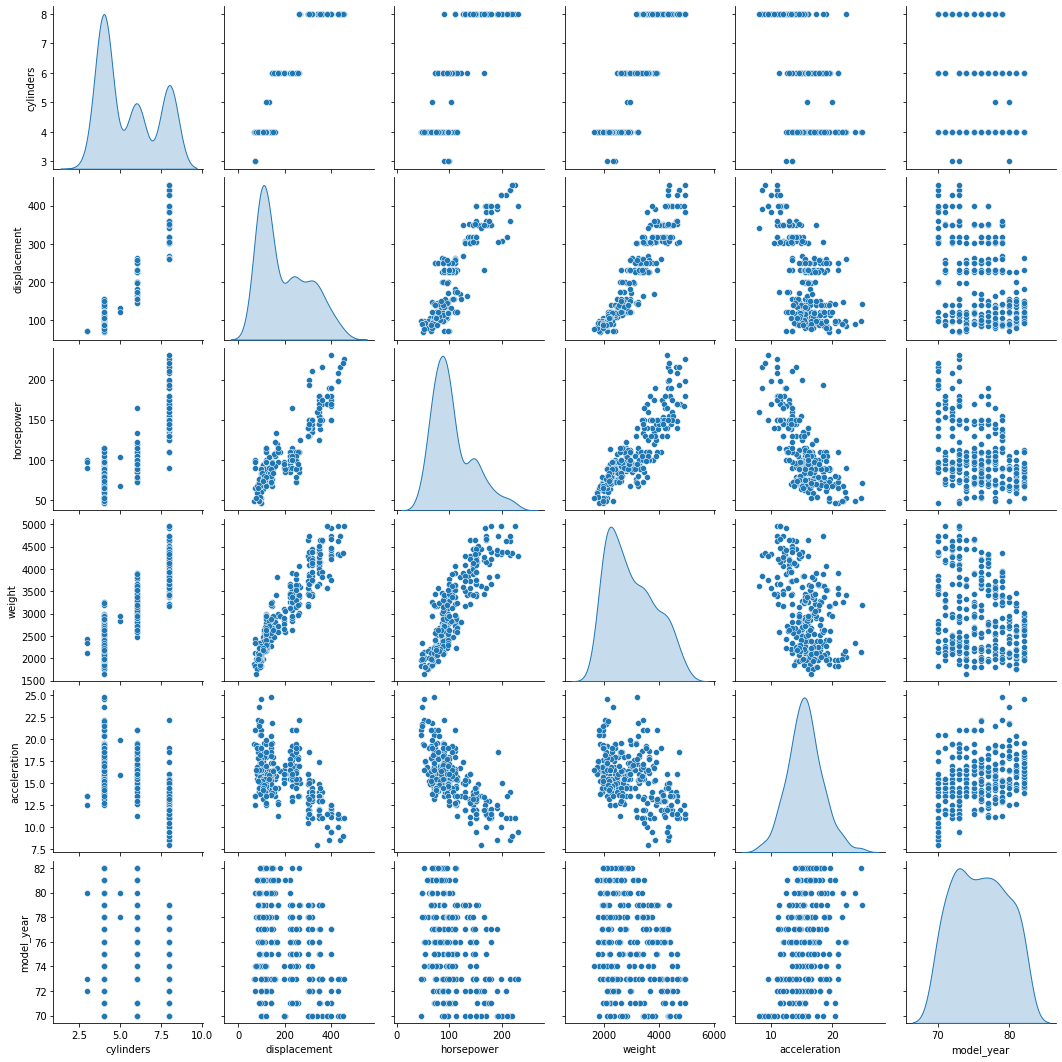

In [16]:
myfeatures = traindata.columns[1:-3] # from cylinders till model_year
sns.pairplot(traindata[myfeatures], diag_kind='kde')
plt.show()

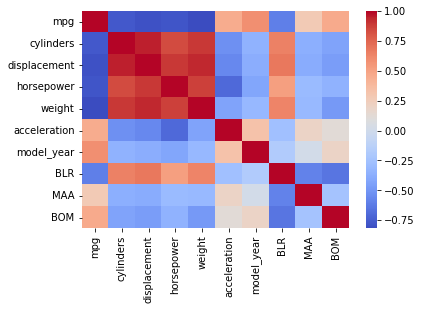

In [17]:
#df.cylinders.value_counts()
corrs = traindata.corr()
sns.heatmap(corrs, cmap='coolwarm')

In [ ]:
# bese variables as per above diagram
# x-> Cylinders, Displacement, Horsepower, weight 

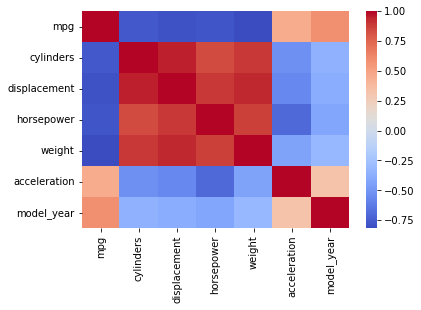

In [18]:
corrs = traindata.iloc[:,:-3].corr()
sns.heatmap(corrs, cmap='coolwarm')

In [ ]:
# to ignore -> Acceleration, model_year

In [19]:
myfeatures = traindata.columns[1:-5]
myfeatures

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

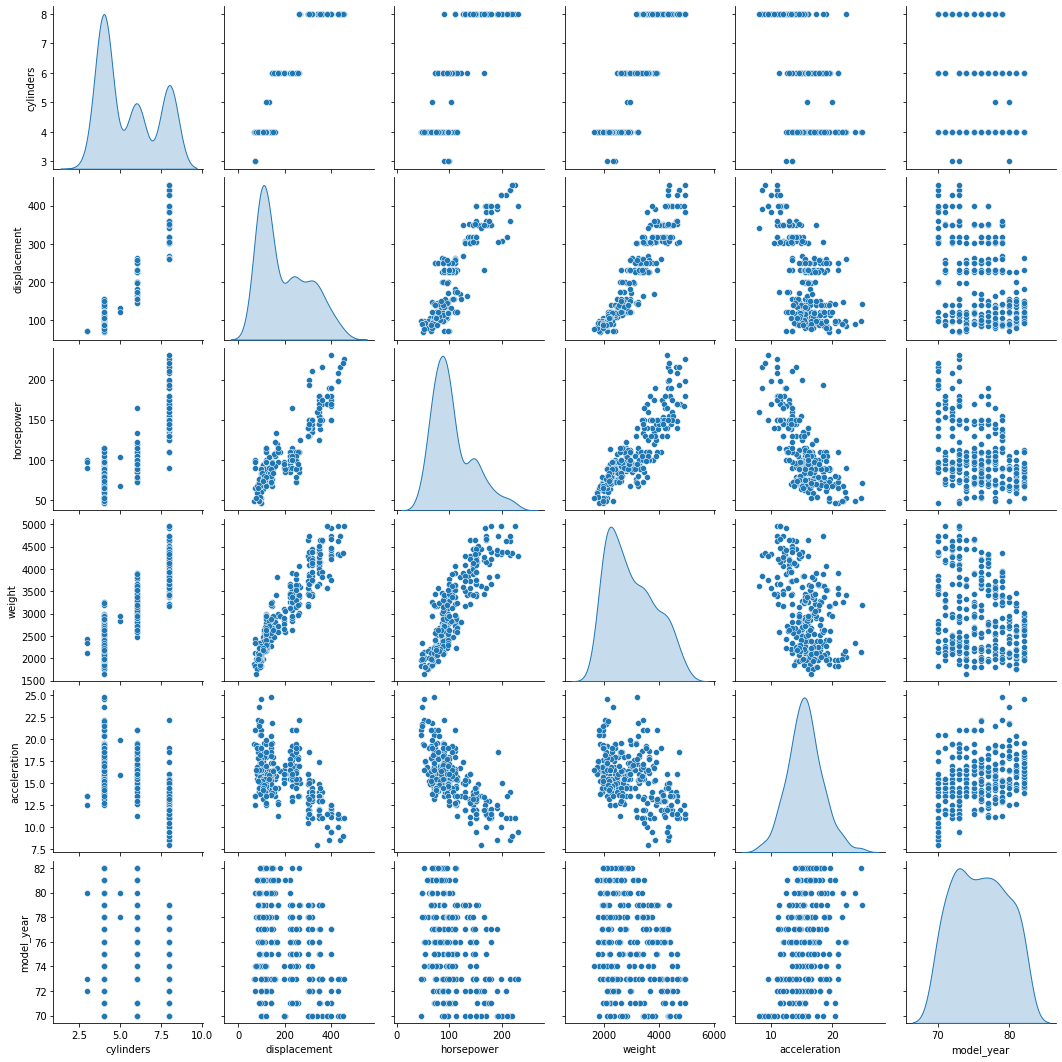

In [20]:
myfeatures=traindata.columns[1:-3]
sns.pairplot(traindata[myfeatures],diag_kind='kde')
plt.show()

In [21]:
myfeatures=myfeatures[:-2]
myfeatures

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [22]:
testdata = df.drop(traindata.index)

In [23]:
ytrain = traindata.pop('mpg')
ytest = testdata.pop('mpg')
xtrain = traindata[myfeatures]
xtest = testdata[myfeatures]

In [24]:
xtest.head()

,cylinders,displacement,horsepower,weight
1,8,350.0,165.0,3693.0
8,8,455.0,225.0,4425.0
13,8,455.0,225.0,3086.0
14,4,113.0,95.0,2372.0
20,4,110.0,87.0,2672.0


In [ ]:
# DATA NORMALIZATION -> Z-Score 

In [ ]:
# Z-Score -> till now we applied Z-Score to entire dataset and then did test/train split

# but in this case, we have first SPLIT! If data was truly together, then MU and SIGMA from training set should have made some
# At the very least, you are Applying the same rules of training normalization into testing norm
# main point here USE the same values of TRAIN-MU and TRAIN-SIGMA for test also! 


In [25]:
stats = xtrain.describe().T
mu = stats['mean']
sigma = stats['std']
# z-score formula -> norm_data = (x-mu) / sigma
xtrain_norm = (xtrain-mu)/sigma
xtest_norm = (xtest-mu)/sigma 
xtest_norm.head()

,cylinders,displacement,horsepower,weight
1,1.450642,1.460190,1.517087,0.829423
8,1.450642,2.455653,3.042823,1.690548
13,1.450642,2.455653,3.042823,0.115347
14,-0.876718,-0.786713,-0.262939,-0.724603
20,-0.876718,-0.815154,-0.466370,-0.371683


In [ ]:
# Now you can see OUTLIERS withrespectto Trainingdata, that would have been Otherwise ignored

In [ ]:
# our objective is 
# mpg = w1*cylinders+ w2*displacement+ w3*horsepower+ w4*weight + bias

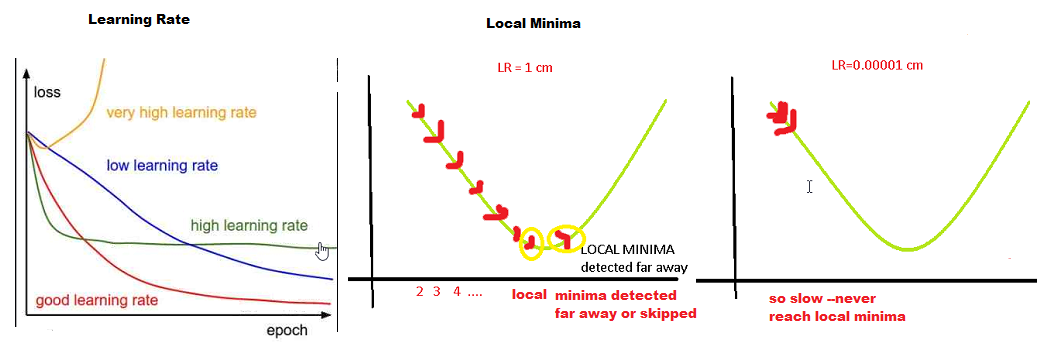

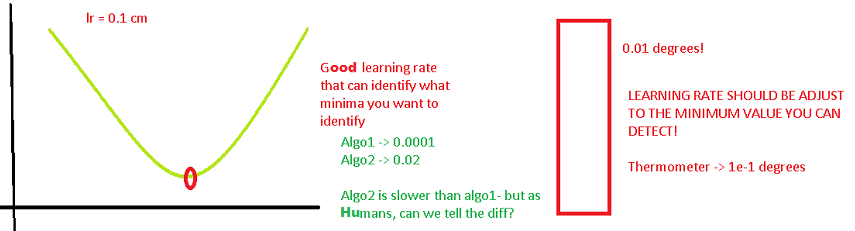

In [26]:
HP_epoch = 1000
HP_dim_l1_l2_firstModel = 64
HP_dim_l2_l3_firstModel = 128
HP_lr_firstModel = 1e-3 # 0.001

HP_dim_l1_l2_secModel = 64
HP_dim_l2_l3_secModel = 256
HP_lr_secModel = 1e-3 # 0.01
# two sets of HP to build and compare 2 diff models 

# LR impacts the OPTIMIZER and LOSS functions, which in turn adjust our weights
opt1 = tf.keras.optimizers.RMSprop(HP_lr_firstModel)
opt2 = tf.keras.optimizers.RMSprop(HP_lr_secModel)

In [27]:
# First Model
m1 = keras.Sequential()
m1.add(keras.layers.Dense(HP_dim_l1_l2_firstModel, activation=tf.nn.relu,input_shape=[len(xtrain.keys())]))
m1.add(keras.layers.Dense(HP_dim_l2_l3_firstModel, activation=tf.nn.relu))
m1.add(keras.layers.Dense(1, activation= tf.nn.relu))
m1.compile(optimizer=opt1, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

# Neural Network -> NO LAYER EXCEPT INPUT LAYER can control input size
# ALL OTHER NN LAYERS HAVE TO TAKE EVERYTHING THAT PREVIOUS LAYER IS SENDING THEM

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
# Second Model
m2 = keras.Sequential()
m2.add(keras.layers.Dense(HP_dim_l1_l2_secModel, activation=tf.nn.relu,input_shape=[len(xtrain.keys())]))
m2.add(keras.layers.Dense(HP_dim_l2_l3_secModel, activation=tf.nn.relu))
m2.add(keras.layers.Dense(1, activation= tf.nn.relu))
m2.compile(optimizer=opt2, loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])

In [29]:
m1.summary() 
# 64 X 128 + 128
# 128 X 1 + 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [30]:
m2.summary()
# 64 X 256 + 256
# 256 X 1 + 1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


In [31]:
# CUSTOM CALLBACK FUNCTIONS 
# 1 epoch = N steps. 
# If data size was D, then in each step we read D/N amount of data. 

class PrintAtEnd(keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs):
    if epoch %100 == 0: print('')
    print('.', end='') # end = ''  will ensure print doesn't change line after printing 

In [32]:
h1 = m1.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[PrintAtEnd()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [33]:
h2 = m2.fit(xtrain_norm, ytrain, epochs=HP_epoch, validation_split=0.2, 
            verbose=0, callbacks=[PrintAtEnd()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

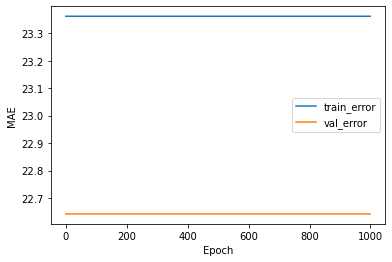

In [34]:
hist1 = pd.DataFrame(h1.history)
hist1['epoch'] = h1.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(hist1['mean_absolute_error'], label='train_error')
plt.plot(hist1['val_mean_absolute_error'], label='val_error')

plt.legend()
plt.show()

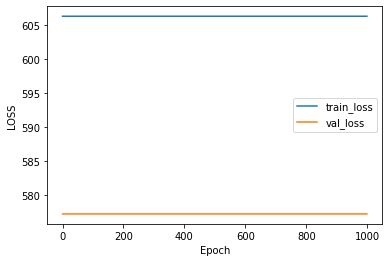

In [38]:
hist1 = pd.DataFrame(h1.history)
hist1['epoch'] = h1.epoch
plt.figure()
plt.xlabel('Epoch')

plt.ylabel('LOSS')

plt.plot(hist1['loss'], label='train_loss')
plt.plot(hist1['val_loss'], label='val_loss')

plt.legend()
plt.show()

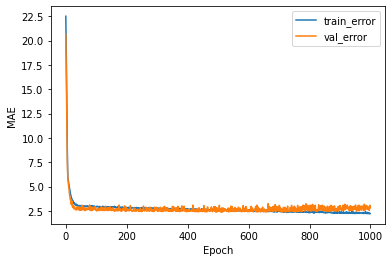

In [35]:
hist2 = pd.DataFrame(h2.history)
hist2['epoch'] = h2.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(hist2['mean_absolute_error'], label='train_error')
plt.plot(hist2['val_mean_absolute_error'], label='val_error')

plt.legend()
plt.show()